<a href="https://colab.research.google.com/github/DharmeshRV/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Predictiond0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**           - Dharmesh Kumar

# **Project Summary -**

Our client is an Insurance company which has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders from the past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of any unfortunate accident by the vehicle, the insurance provider company will provide a compensation to the customer.

**1. Data Wrangling**
* Getting the data
* Understanding the variables
* Treating the missing values and outliers

**2. Exploratory Data Analysis**
* Checking the distribution of response variable
* Checking the distribution of independent variables
* Checking feature-wise responses
* Checking correlation among variables


**3. Data Pre-processing**
* Encoding the Categorical Variables
* Data splitting and handling class imbalance

**4. Classification Algorithms and Implementation :**

1. Logistic regression

2. Random Forest Classifier

3. AdaBoost Classifier

# **GitHub Link -**

https://github.com/DharmeshRV/Health-Insurance-Cross-Sell-Prediction

# **Problem Statement**


**Building a model to predict whether a customer would be interested in vehicle insurance is extremely helpful for the company because it can accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue. In order to predict whether the customer will be interested in vehicle insurance you have information about demographics(gender, age, region code), vehicles and policy etc.**

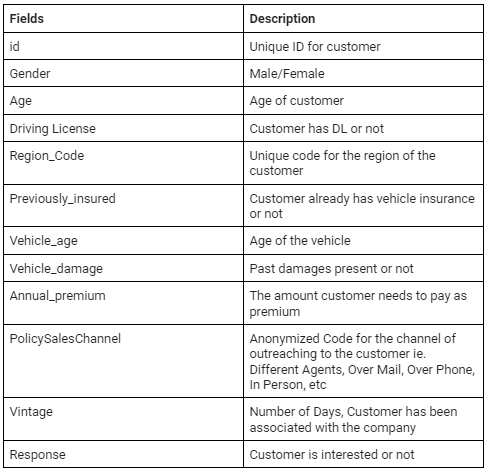

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [10]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Health Insurance Cross Sell Prediction - Dharmesh Kumar/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [13]:
# Dataset First Look
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [14]:

# Dataset Rows & Columns count
dataset.shape

(381109, 12)

### Dataset Information

In [15]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [16]:
# Dataset Duplicate Value Count (True shows duplicate row)
dataset.duplicated().value_counts()

False    381109
dtype: int64

There are no duplicated rows in the dataset.

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Great! no null values as well.

### What did you know about your dataset?

The dataset contains the information of the customers holding Health Insurance policy of an Insurance company. Now they need to build a model to predict whether the policyholders from the past year will also be interested in Vehicle Insurance provided by the company. With the help of this model  the company can communicate efficiently to interested customers.

The dataset has 381109 rows and 12 columns. There are no missing values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [19]:
# Dataset Describe
dataset.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


### Variables Description 

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
columnz = dataset.columns.to_list()
for i in columnz:
  print('The number of Unique Values in', i, 'are:', dataset[i].nunique())

The number of Unique Values in id are: 381109
The number of Unique Values in Gender are: 2
The number of Unique Values in Age are: 66
The number of Unique Values in Driving_License are: 2
The number of Unique Values in Region_Code are: 53
The number of Unique Values in Previously_Insured are: 2
The number of Unique Values in Vehicle_Age are: 3
The number of Unique Values in Vehicle_Damage are: 2
The number of Unique Values in Annual_Premium are: 48838
The number of Unique Values in Policy_Sales_Channel are: 155
The number of Unique Values in Vintage are: 290
The number of Unique Values in Response are: 2


In [21]:
#creating list of numerical and categorical columns
num_columns=[]
for col in columnz:
  if dataset[col].nunique()>3:
    num_columns.append(col)
categorical_columns=list(set(columnz)-set(num_columns))

In [22]:
#Check Unique Values in categorical variables

for i  in categorical_columns:
  print('The Unique Values in', i, 'are:', dataset[i].unique())

The Unique Values in Previously_Insured are: [0 1]
The Unique Values in Response are: [1 0]
The Unique Values in Gender are: ['Male' 'Female']
The Unique Values in Vehicle_Age are: ['> 2 Years' '1-2 Year' '< 1 Year']
The Unique Values in Driving_License are: [1 0]
The Unique Values in Vehicle_Damage are: ['Yes' 'No']


## ***3. Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.

# The 'id' column is not relevant in the modeling so we drop it
dataset.drop(columns=['id'],inplace=True)
num_columns.remove('id')

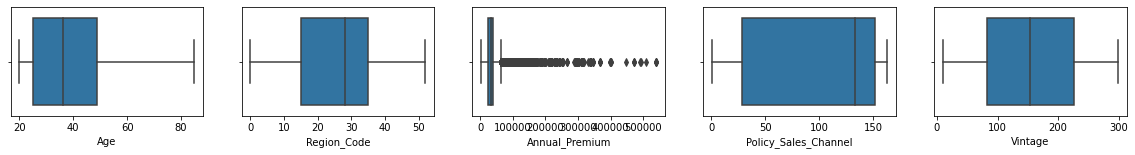

In [24]:
# box plot for each numerical column to check the outliers
plt.figure(figsize=(20, 2))
box=1
for col in num_columns:
    plt.subplot(1, 5, box)
    sns.boxplot(x=dataset[col])
    box+=1
plt.show()

The 'Annual_Premium' variable is highly positively skwed so I'll remove the outliers. Other numerical columns have no outliers.

In [25]:
# Code to remove the outliers in Annual_Premium to maintain the normality of data

# Calculating the quantiles
quantile_1=np.quantile(dataset["Annual_Premium"],0.25)
quantile_3=np.quantile(dataset["Annual_Premium"],0.75)

#IQR
IQR=quantile_3-quantile_1

# Getting the whiskers
whisker_1=quantile_1-1.5*IQR
whisker_2=quantile_3+1.5*IQR

# Removing the outliers
dataset=dataset[(dataset["Annual_Premium"]<whisker_2) & (dataset["Annual_Premium"]>whisker_1)]

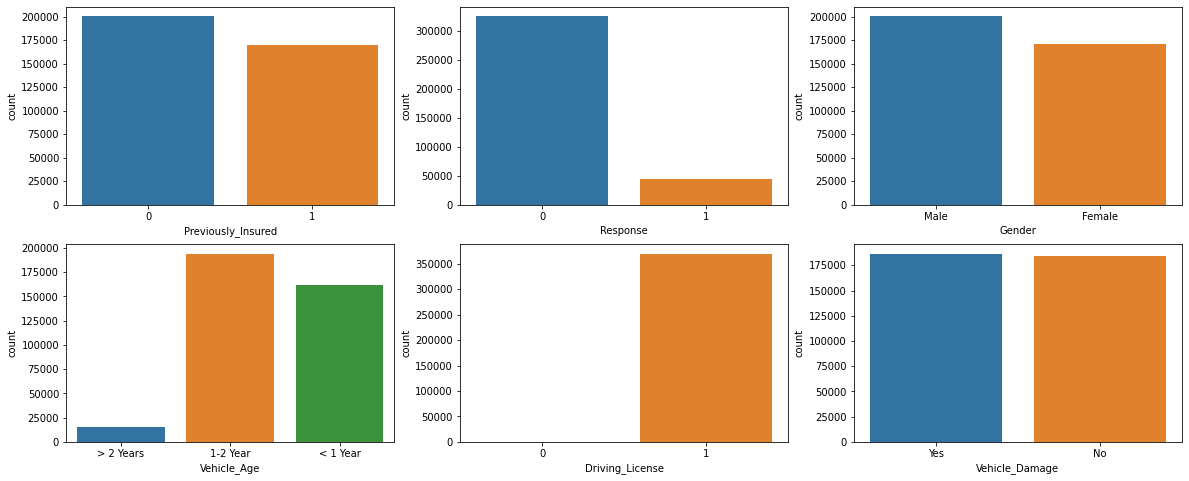

In [26]:
# Counting the values in categorical features
bar=1
plt.figure(figsize=(20,8))

for col in categorical_columns:
  plt.subplot(2, 3, bar)
  sns.countplot(dataset[col])
  bar+=1

The dependent variable shows that the data is highly imbalanced. Vehicles more than 2 years of age are less in numbers as compared to other two classes.  Also, the people without driving license are negligible.

### What all manipulations have you done and insights you found?

The 'id' column did not convey any information so we removed it first. The 'Annual_Primium' variable was highly skwed so we treated the outliers to get it normalized. 'Response' showed imbalanced class. '1' response value is approximately 7 times lower than the '0' value and it'll be handled later.
